In [47]:
import sage.graphs as graphs
import numpy as np
import itertools
from sympy import Point, Triangle, Segment
import struct
import multiprocessing 
import os.path
from os import path
import random

In [48]:
def ordertypes(n):
    wsize = 2
    fmttype = "H"
    if n < 9: 
        fname = "otypes0%d.b08" %(n,)
        wsize = 1
        fmttype = "B"
    elif n == 9:
        fname = "otypes09.b16"
    else: 
        fname = "otypes%d.b16" % (n,)
    f = open(fname, "rb")
    content = f.read()
    totalints = len(content)//wsize
    ints = struct.unpack("<"+str(totalints)+fmttype, content)
    pointsets = []
    i = 0
    for set in range(totalints//(2*n)):
        pointset= []
        for idx in range(n):
            pointset.append((ints[i],ints[i+1]))
            i +=2
        pointsets.append(pointset)
    return pointsets

In [49]:
def drawResult(points,triangulos):
    P = point(points)
    for triangulo in triangulos:
        r = randint(0,255)/255
        g = randint(0,255)/255
        b = randint(0,255)/255
        if type(triangulo) == np.int64:
            P += polygon([points[triangulos[0]],points[triangulos[1]],points[triangulos[2]]], alpha=0.3, rgbcolor=(r,g,b))
            return P
        else:
            P += polygon([points[triangulo[0]],points[triangulo[1]],points[triangulo[2]]], alpha=0.3, rgbcolor=(r,g,b))
    return P

In [55]:
setNumber = 8
orders = ordertypes(setNumber)
histogram = np.zeros(setNumber, dtype=int)
maximo = 0
for index in range(0,len(orders)):
    name = 'Results_' + str(setNumber) + '/result_' + str(index) + '.txt'
    if path.exists(name):
        triangulos = []
        with open(name, 'r') as f:
            triangulos = f.read()
            triangulos = eval(triangulos)
        indiceHistograma = len(triangulos)-1
        histogram[indiceHistograma] = 1 + histogram[indiceHistograma]
        if maximo < len(triangulos):
            maximo = len(triangulos)
            
indicesMaximos = []         
triangulosMaximos = []
for index in range(0,len(orders)):
    name = 'Results_' + str(setNumber) + '/result_' + str(index) + '.txt'
    if path.exists(name):
        triangulos = []
        with open(name, 'r') as f:
            triangulos = f.read()
            triangulos = eval(triangulos)
        if len(triangulos) == maximo:
            triangulosMaximos.append(triangulos)
            indicesMaximos.append(index)
                


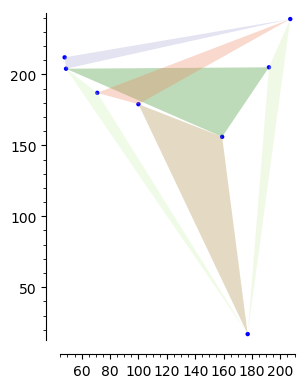

In [56]:
elegido = 1
orderMaximo = orders[indicesMaximos[elegido]]
drawResult(orderMaximo, triangulosMaximos[elegido])

In [57]:
print(histogram)

[   0    0    0   13 2075 1227    0    0]


In [ ]:
eval("[(0, 3, 4), (1, 2, 3)]\n")